<a href="https://colab.research.google.com/github/rosaandrie/coba1/blob/master/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chinese melayu
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
chinese madura
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
chinese batak
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
chinese jawa
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
melayu madura
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
melayu batak
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
melayu jawa
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
madura batak
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
madura jawa
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
batak jawa
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


group1,group2,meandiff,p-adj,lower,upper,reject
batak,chinese,1.0645,0.8852,-2.11,4.2391,False
batak,jawa,3.0192,0.0028,0.7443,5.2941,True
batak,madura,1.4789,0.4391,-0.9053,3.863,False
batak,melayu,0.2614,0.9,-2.253,2.7757,False
chinese,jawa,1.9547,0.175,-0.4575,4.3668,False
chinese,madura,0.4143,0.9,-2.1011,2.9297,False
chinese,melayu,-0.8032,0.9,-3.4423,1.836,False
jawa,madura,-1.5404,0.004,-2.734,-0.3468,True
jawa,melayu,-2.7579,0.001,-4.194,-1.3217,True
madura,melayu,-1.2175,0.2318,-2.821,0.386,False


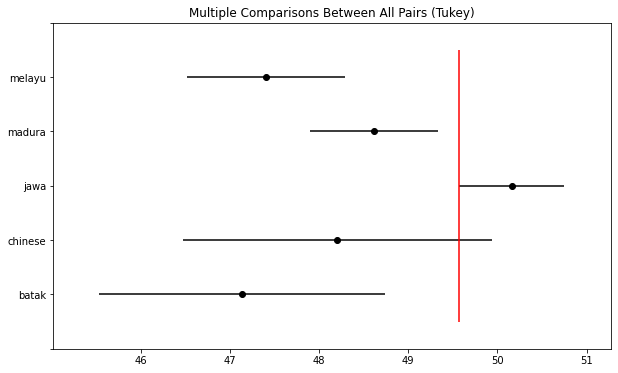

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(12)

suku =   ["chinese","melayu","madura","batak","jawa"]

# Membuat data acak dengan probabilitas tetap
voter_suku = np.random.choice(a= suku, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

# Generate distribusi yang berbeda untuk usia suku jawa
usia_jawa = stats.poisson.rvs(loc=18, mu=32, size=1000)

voter_usia = stats.poisson.rvs(loc=18, mu=30, size=1000)

voter_usia = np.where(voter_suku=="jawa", usia_jawa, voter_usia)

# kelompok usia berdasarkan suku
voter_frame = pd.DataFrame({"suku":voter_suku,"usia":voter_usia})
groups = voter_frame.groupby("suku").groups

# Ekstrak kelompok individual
jawa = voter_usia[groups["chinese"]]
melayu = voter_usia[groups["melayu"]]
madura = voter_usia[groups["madura"]]
batak = voter_usia[groups["batak"]]
chinese = voter_usia[groups["jawa"]]

# melakukan test ANOVA one-way
stats.f_oneway(chinese, melayu, madura, batak, jawa)

pasangan_suku = []

for suku1 in range(4):
    for suku2  in range(suku1+1,5):
        pasangan_suku.append((suku[suku1], suku[suku2]))

# Hitung t-test untuk tiap pasangan
for suku1, suku2 in suku_pairs: 
    print(suku1, suku2)
    print(stats.ttest_ind(voter_usia[groups[suku1]], 
                          voter_usia[groups[suku2]]))

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_usia,     # Data
                          groups=voter_suku,   # Kelompok
                          alpha=0.05)          # Level Signifikan

tukey.plot_simultaneous()    # Plot kelompok confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # melihat hasil test